In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [2]:
#read the dataset and check the first five rows
loan= pd.read_csv('loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
loan.shape

(39717, 111)

## Data Handling and Cleaning

In [4]:
#Check the datatypes of all the columns of the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Check Missing Value 

In [6]:
#Check the number of null values in the columns
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
loan.id

0        1077501
1        1077430
2        1077175
3        1076863
4        1075358
          ...   
39712      92187
39713      90665
39714      90395
39715      90376
39716      87023
Name: id, Length: 39717, dtype: int64

 Here, We observed that there are many missing values so Lets remove them 1st

In [8]:
loan=loan.dropna(axis=1, how= 'all')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### There are several columns which represent only NA or 0 , remove such Columns because these columns wont help in analysis

In [9]:
loan= loan.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### After droping few columns still we have 48 such columns in which few are post approval loan columns 

* Such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state". These columns have no   use in contributing of loan defaulting analysis so we should remove them.

* Column 'desc' has text data which has no use in analysis so we should remove them too.

* "funded_amnt_inv" column is there so we don't need of column "funded_amnt" because we only need to know how much is funded in  
  actual.
  
* In the loan defaulting analysis we have no use of columns like "out_prncp_inv" , "total_pymnt_inv " so we should remove them   too.



  
  


### List of post-approval features
* delinq_2yrs
* revol_bal
* out_prncp
* total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* next_pymnt_d
* chargeoff_within_12_mths
* mths_since_last_delinq
* mths_since_last_record

In [10]:
loan=loan.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1)

In [11]:
# Cross check the details of data 
loan.shape

(39717, 21)

In [12]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

### Check Missing Value

In [13]:
(loan.isnull().sum()/len(loan.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.706650
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.125891
total_acc              0.000000
dtype: float64

#### Here we can see columns "emp_length" & "revol_util" have some missing value. Lets fill up these columns with mode value

* The missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much

In [14]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isnull().sum()

0

In [15]:
loan.revol_util.fillna(loan.revol_util.mode()[0], inplace = True)
loan.revol_util.isnull().sum()

0

In [16]:
#Cross check the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           39717 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

#### The Purpose of this analysis is to check who is likely to default which can be only observed by checking the case of fully paid or charged off loans.
* To achieve the above goal we need to remove the record of current or running loan status 

In [17]:
loan = loan[loan.loan_status != "Current"]
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [18]:
# Cross check the data
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [19]:
(loan.revol_util)


0        83.70%
1         9.40%
2        98.50%
3           21%
5        28.30%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 38577, dtype: object

### Standardizing the data

* Types of few columnns should be in integer but they are in object so at first we need to standarize these columns.



In [20]:
loan.revol_util = pd.to_numeric(loan.revol_util.apply(lambda x : x.split('%')[0]))

In [21]:
#cross check revol_util column
loan.revol_util

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38577, dtype: float64

In [22]:
loan.int_rate = pd.to_numeric(loan.int_rate.apply(lambda x : x.split('%')[0]))

In [23]:
#cross check int_rate column
loan.int_rate.dtypes

dtype('float64')

In [39]:
loan.emp_length = pd.to_numeric(loan.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [40]:
# cross check emp_length column
loan.emp_length.dtypes

dtype('int64')

In [41]:
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


### Outliers Analysis Using Boxplot

* check the outliers in annual_inc

In [26]:
import warnings
warnings.filterwarnings('ignore')

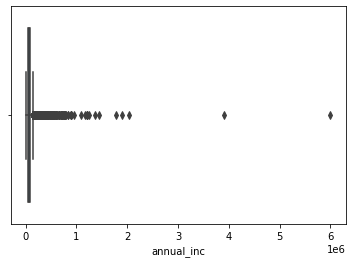

In [27]:
sns.boxplot(loan['annual_inc'])
plt.show()

### Here we can see the outliers easily 

* our first goal to remove the outliers
* Standard range to consider the outliers is the value after 95 percentile so our threshold for removing the outliers should be 95

In [28]:
loan_quantile_info = loan.annual_inc.quantile([0.25, 0.5, 0.75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.98, 0.99])
loan_quantile_info

0.25     40000.0
0.50     58868.0
0.75     82000.0
0.80     90000.0
0.85    100000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [29]:
loan_annual_inc_95=loan['annual_inc'].quantile(0.95)
loan = loan[loan.annual_inc <= loan_annual_inc_95]

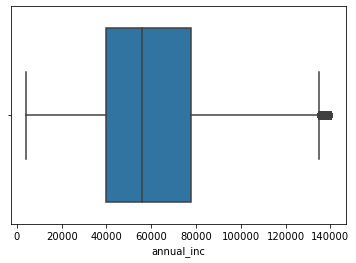

In [30]:
sns.boxplot(loan.annual_inc)
plt.show()

### Lets analyze other numerical variables columns and check the outliers in these columns
* Numerical variables columns:-

    1) loan_amnt
    
    2) dti
    
    3) funded_amnt_inv

<AxesSubplot:xlabel='loan_amnt'>

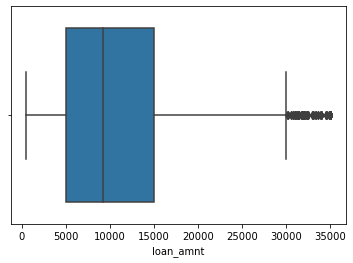

In [31]:
sns.boxplot(loan.loan_amnt)

In [32]:
loan.loan_amnt.quantile([0.25, 0.50, .75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.975, 0.98, 0.99, 1.0])

0.250     5000.0
0.500     9250.0
0.750    15000.0
0.800    16000.0
0.850    18000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='dti'>

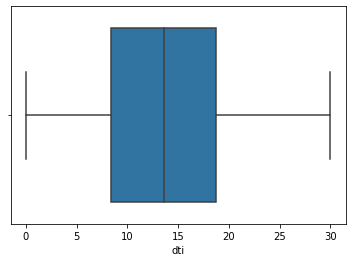

In [33]:
sns.boxplot(loan.dti)

<AxesSubplot:xlabel='funded_amnt_inv'>

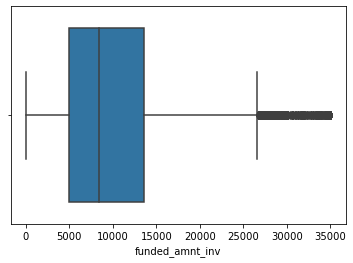

In [34]:
sns.boxplot(loan.funded_amnt_inv)

In [35]:
loan.funded_amnt_inv.quantile([0.25, 0.50, .75, 0.80, 0.85, 0.90, 0.95, 0.97, 0.975, 0.98, 0.99, 1.0])

0.250     4975.000000
0.500     8375.000000
0.750    13623.731415
0.800    14975.000000
0.850    16409.453768
0.900    19750.000000
0.950    23941.875589
0.970    24975.000000
0.975    25350.000000
0.980    27950.000000
0.990    31954.028576
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

#### There is no need to remove the outliers in the above columns, because distribution of data in the the columns are in continuous manner.  

### Visualization Categorical Data

#### As we have grade column so now we are going to extract only subgrade (int level value) from the sub_grade variable

* We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

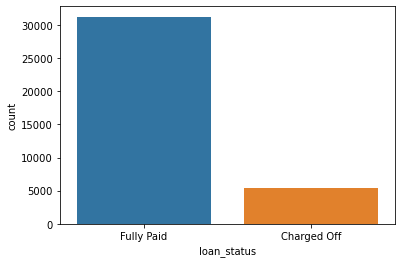

In [36]:
sns.countplot(x = 'loan_status', data = loan)
plt.show()

In [37]:
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

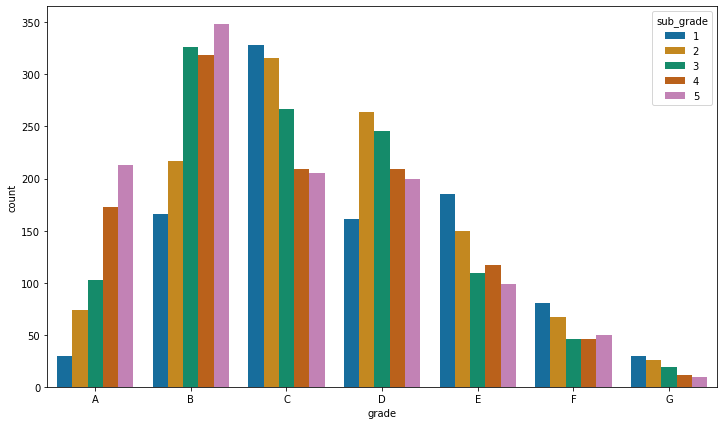

In [42]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])

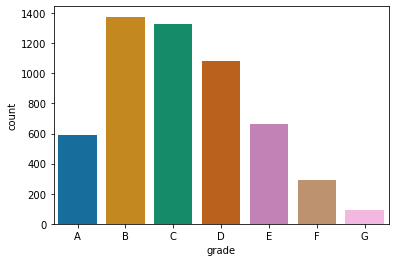

In [43]:
sns.countplot(x = 'grade', data = loan[loan.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

### Analyzing other data like home_ownership

In [44]:
#check unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [51]:
loan['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
5            RENT
           ...   
39711    MORTGAGE
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39716         OWN
Name: home_ownership, Length: 36654, dtype: object

#### There are few value of 'NONE' so we are going to replace it with 'OTHER' values.

In [52]:
loan['home_ownership']=loan['home_ownership'].replace(to_replace = ['NONE'],value='OTHER')

In [53]:
#Cross-check unique values for home_ownership
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

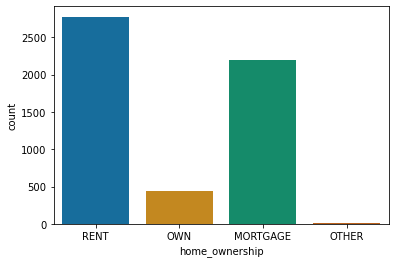

In [55]:
sns.countplot(x='home_ownership', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

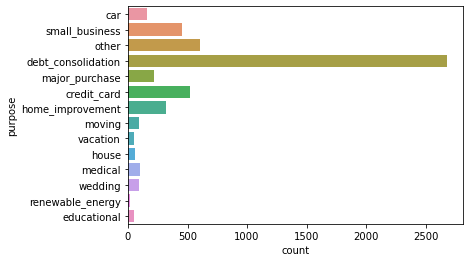

In [59]:
sns.countplot(y ='purpose', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

### We need to create bins to convert numerical variables into categorical one

In [61]:
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['revol_util_groups'] = pd.cut(loan['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [62]:
#Cross check new bins
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,1,3,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,5,3,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2,2,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,1,10,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,3,9,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k


#### Analyzing rate of interest with respect to the rate of interest of bins

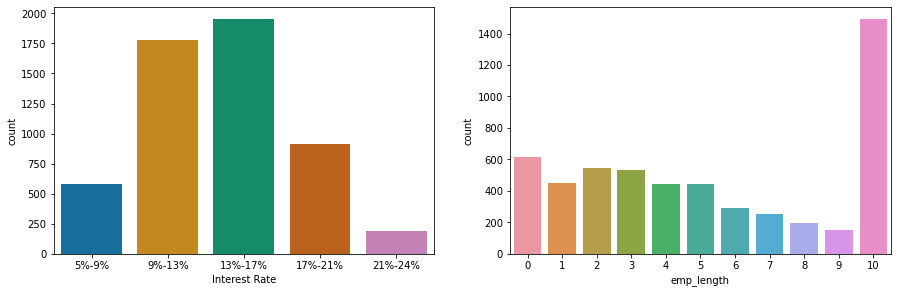

In [64]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

#### In Similar ways we have to analyze other columns like open_acc,revol_util,total_acc,annual_inc

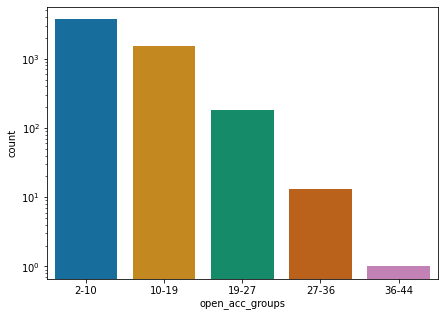

In [66]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

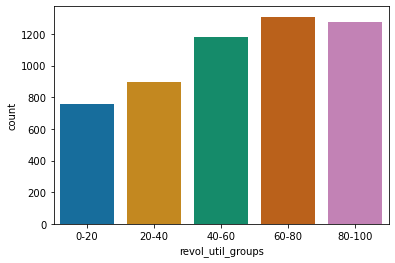

In [68]:
sns.countplot(x='revol_util_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

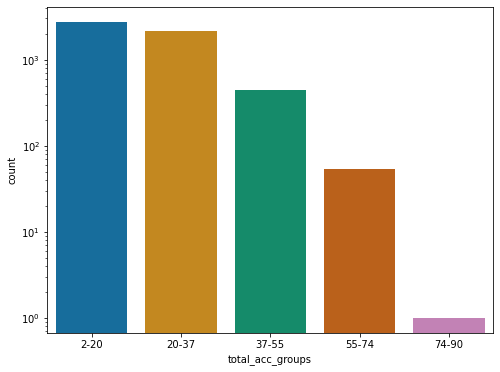

In [70]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

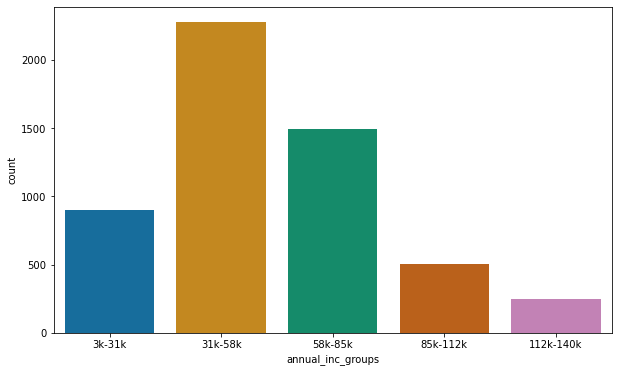

In [73]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan[loan.loan_status == 'Charged Off'])
plt.show()

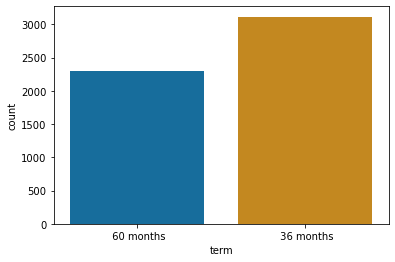

In [76]:
sns.countplot(x='term', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

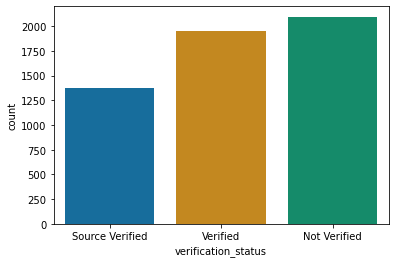

In [78]:
sns.countplot(x='verification_status', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

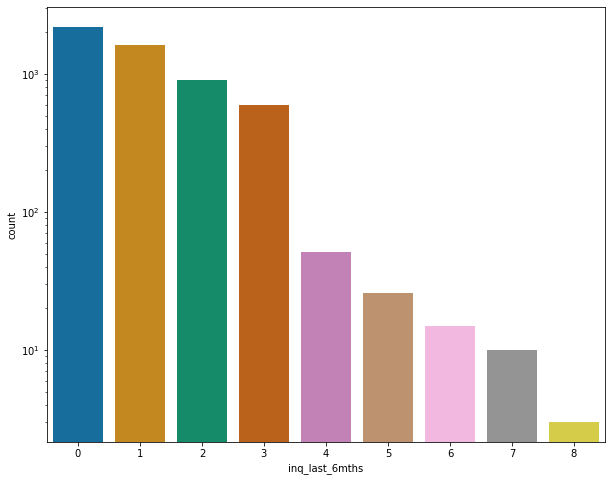

In [81]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

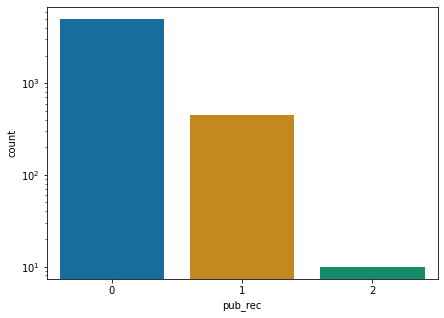

In [82]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

### Analyzing by issued month and year

In [84]:
## Extracting month and year
New_month_year = loan['issue_d'].str.partition("-", True)     
loan['Issue_month']=New_month_year[0]                       
loan['Issue_year']='20' + New_month_year[2]
loan.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,pub_rec,revol_util,total_acc,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,Issue_month,Issue_year
0,5000,4975.0,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,0,83.7,9,9%-13%,2-10,80-100,2-20,3k-31k,Dec,2011
1,2500,2500.0,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,0,9.4,4,13%-17%,2-10,0-20,2-20,3k-31k,Dec,2011
2,2400,2400.0,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,0,98.5,10,13%-17%,2-10,80-100,2-20,3k-31k,Dec,2011
3,10000,10000.0,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,0,21.0,37,13%-17%,2-10,20-40,20-37,31k-58k,Dec,2011
5,5000,5000.0,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,0,28.3,12,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011


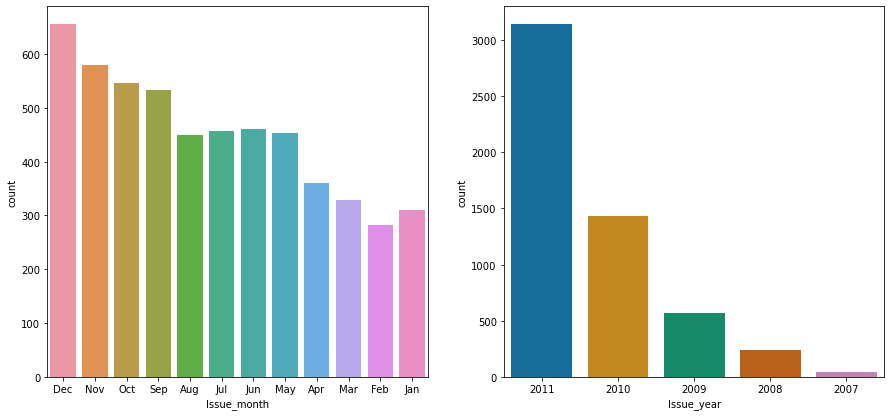

In [86]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='Issue_month', data=loan[loan['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='Issue_year', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

### From the above chart here we can see the max. no. of defaults occured when the loan was issued in Dec. Loan issued in the year 2011 were also as compared to other years

#### Analyzing other columns like installment,dti, loan_amnt


In [87]:
loan['installment_groups'] = pd.cut(loan['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan['funded_amnt_inv_group'] = pd.cut(loan['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan['loan_amnt_groups'] = pd.cut(loan['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan['dti_groups'] = pd.cut(loan['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

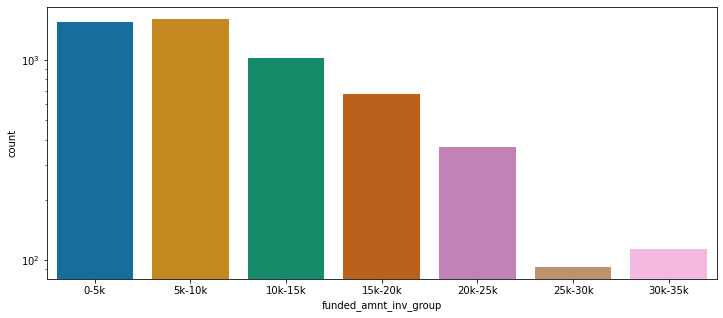

In [88]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

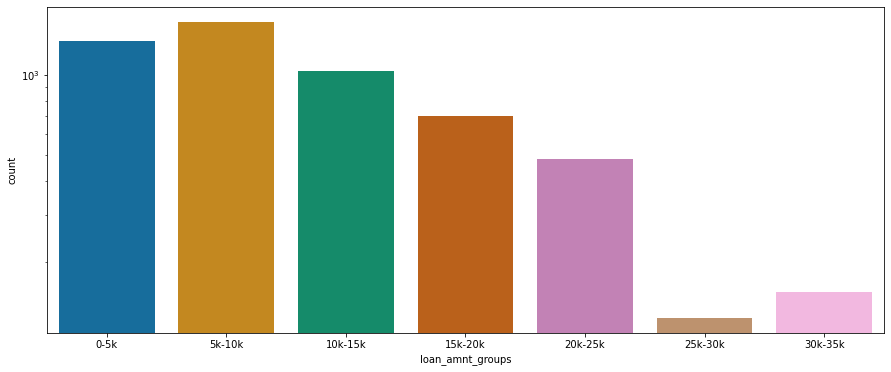

In [89]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

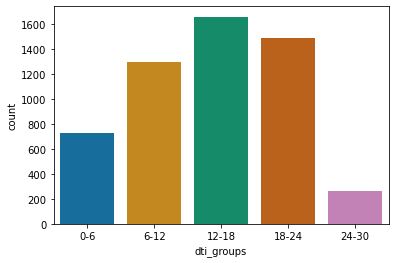

In [90]:
sns.countplot(x='dti_groups', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

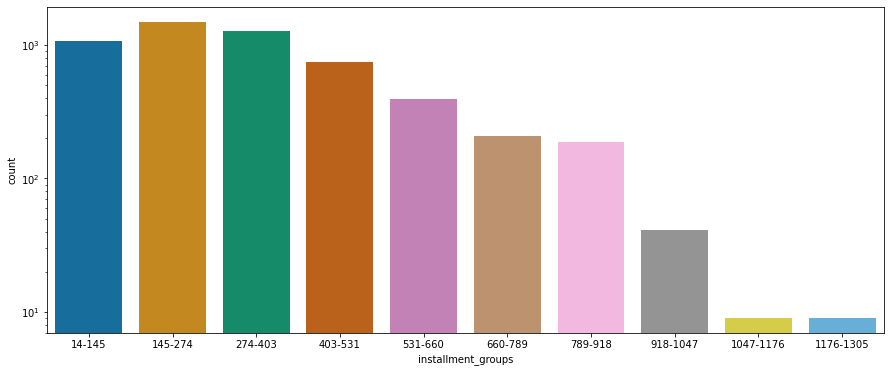

In [91]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan[loan['loan_status']=='Charged Off'])
plt.show()

# Observations

### From the above analysis of each variables against the charged off loans suggests the following points.
#### There are more probability of defaulting when :

* Applicants who use the loan to clear other debts
* Applicants who receive interest at the rate of 13-17%
* Applicants who have an income of range 31201 - 58402
* Applicants having house_ownership as 'RENT'
* When funded amount by investor is between 5000-10000
* Loan amount is between 5429 - 10357
* Dti is between 12-18
* When monthly installments are between 145-274
* Term of 36 months
* Applicants who have 20-37 open_acc
* Applicants with employement length of 10
* When the loan status is Not verified
* When the no of enquiries in last 6 months is 0
* When the number of derogatory public records is 0
* When the purpose is 'debt_consolidation'
* Grade is 'B'
* At last a total grade of 'B5' level.

#### We have observed very interesting thing here, the late month of the year indicated the high possibility of defaulting.

* The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin) 

##### Lets analysing annual income with other columns to get more idea

 * Annual income vs loan purpose

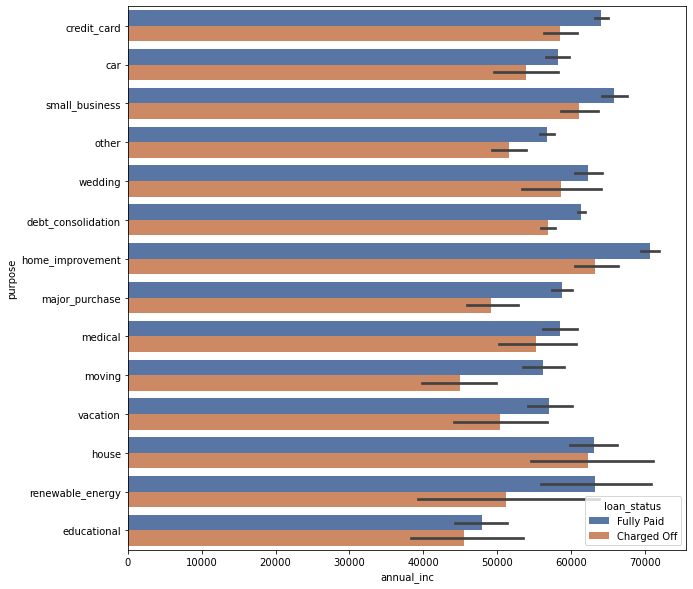

In [93]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.

 * Applicants with higher salary mostly applied loans for "small_businesses",  "house", "renewable_energy", and "home_improvment".

#### Annual income vs home ownership

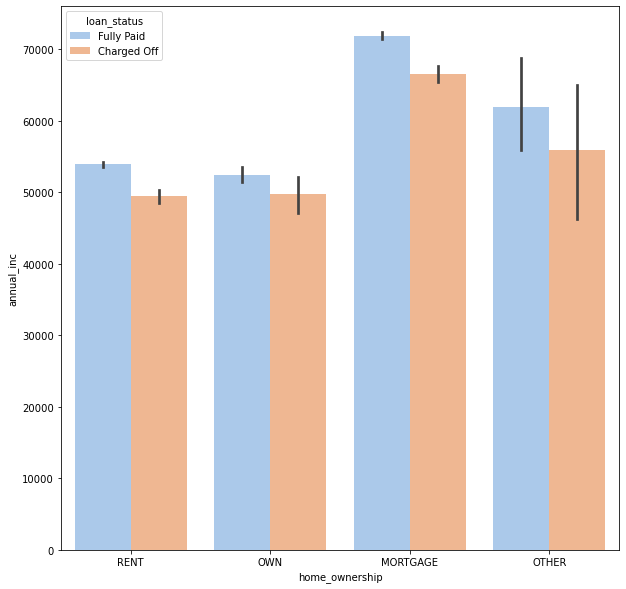

In [94]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Annual Income vs Loan amount

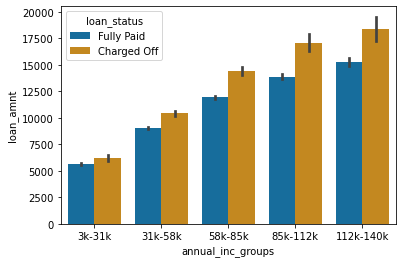

In [96]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)
plt.show()

##### Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest.

* Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

#### * Annual income vs home ownership

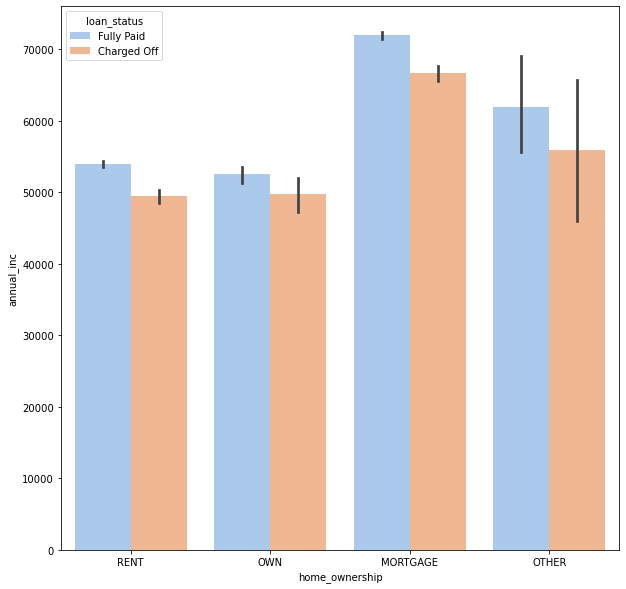

In [97]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Annual Income vs Loan amount

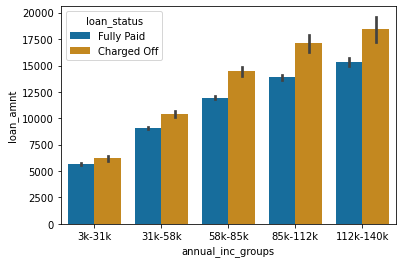

In [99]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = loan)
plt.show()

#### From the above observations, across all the income groups, the loan_amount is higher for people who defaulted. 

#### Annual income vs int_rate

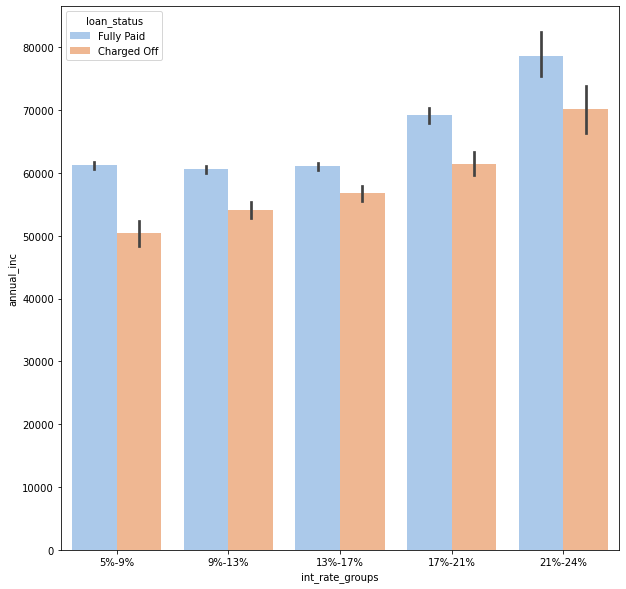

In [100]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### Analysing loan_amount with other columns to get clear views

#### Loan Amount vs Interest Rate

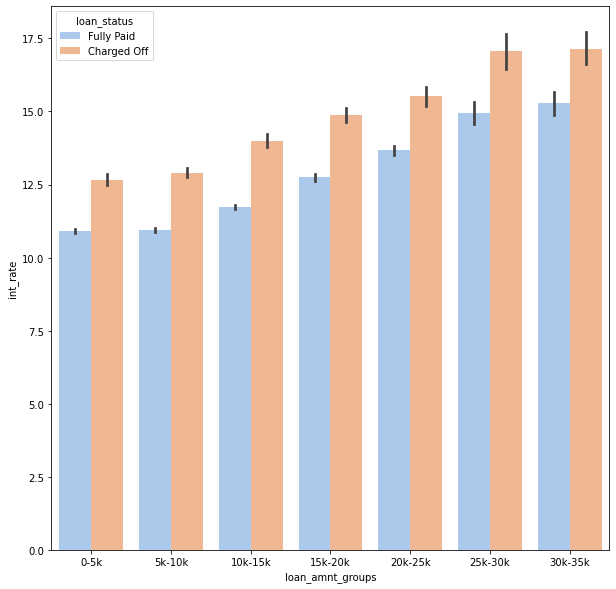

In [102]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs Loan purpose

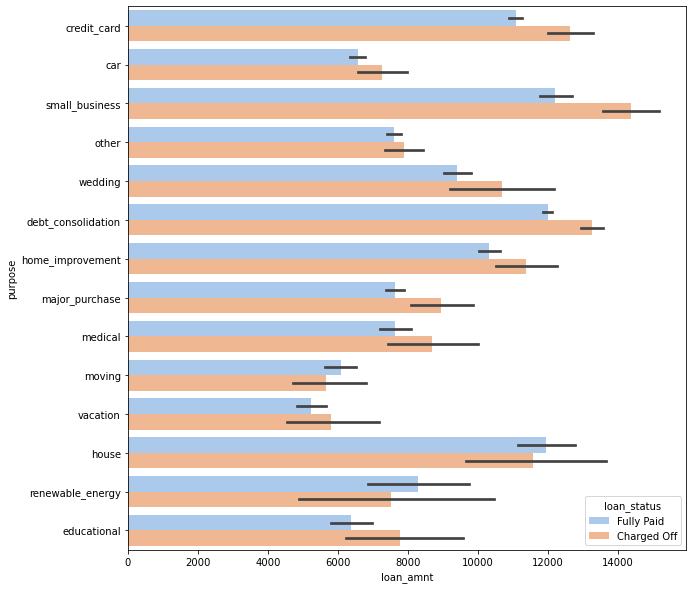

In [103]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

#### Loan vs House Ownership

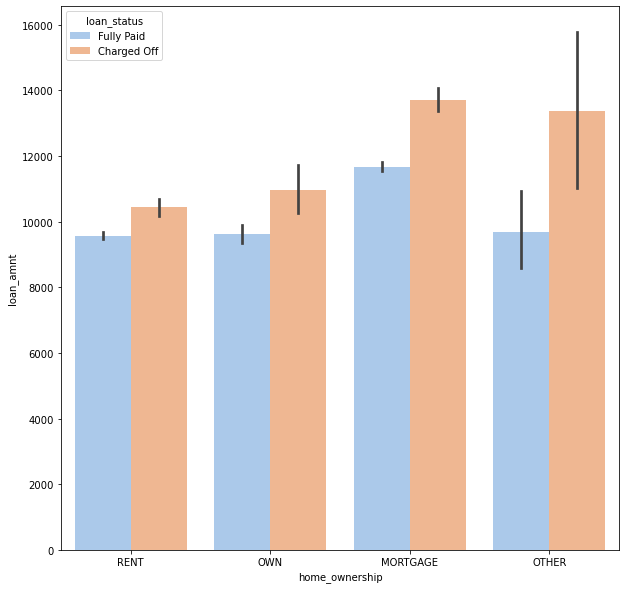

In [105]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, x='home_ownership', y='loan_amnt', hue ='loan_status',palette="pastel")
plt.show()

### Loan amount vs month issued and year issued

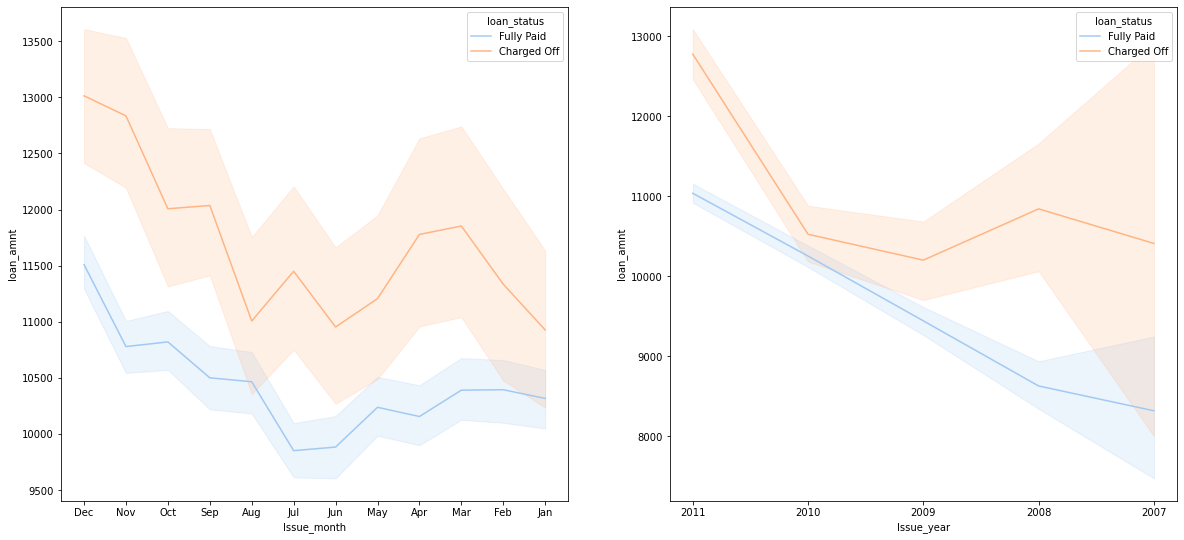

In [107]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan, y='loan_amnt', x='Issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan, y='loan_amnt', x='Issue_year', hue ='loan_status',palette="pastel")
plt.show()

#### Loan amount vs Grade

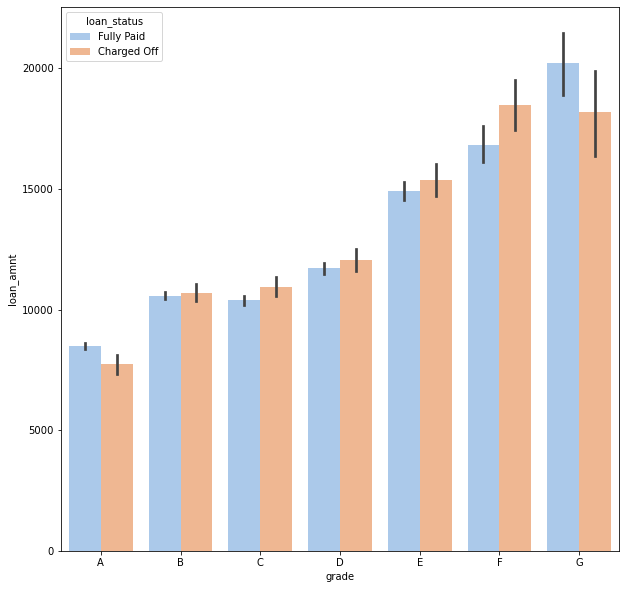

In [109]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, y='loan_amnt', x='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

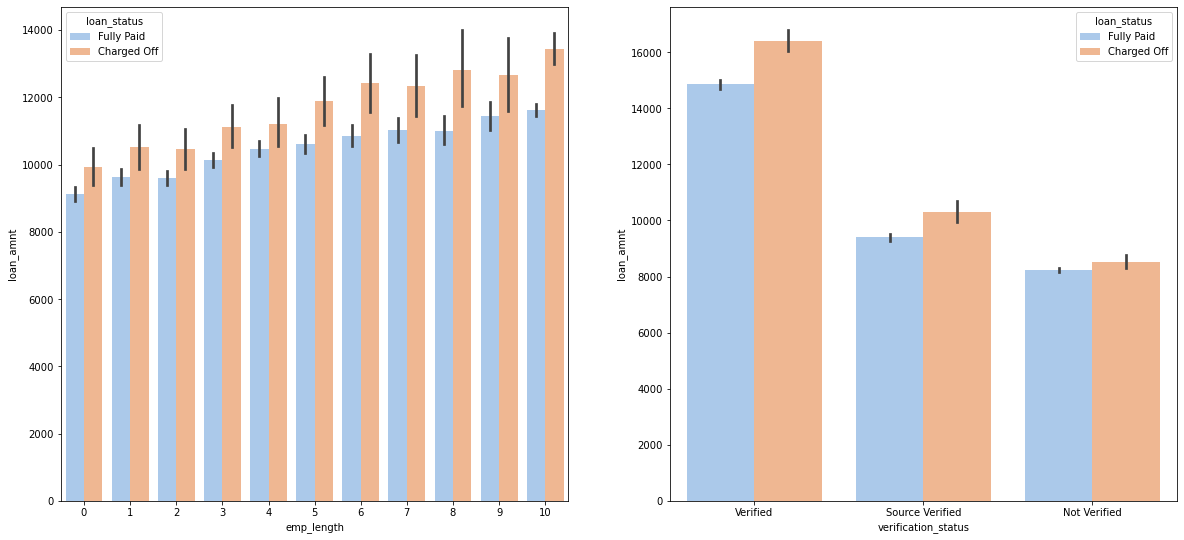

In [110]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan, y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan, y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")
plt.show()

#### From the above observations we got to know employees with longer working history got the loan approved for a higher amount.

* Looking at the data "verification status", verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

### grade vs interest rate

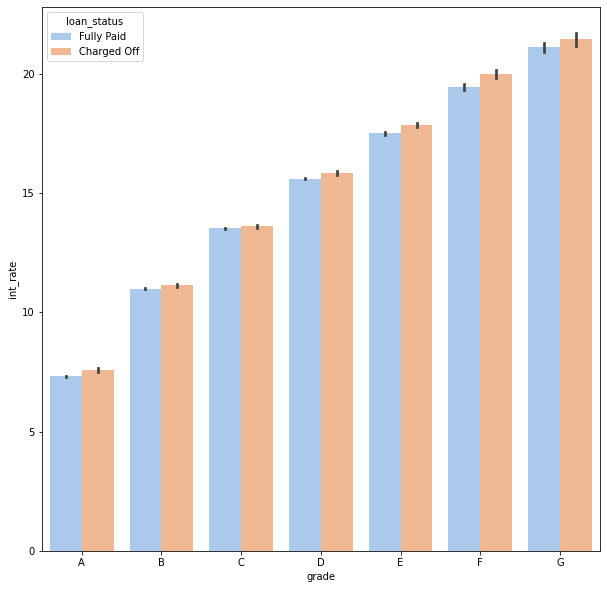

In [112]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan, y='int_rate', x='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 432x288 with 0 Axes>

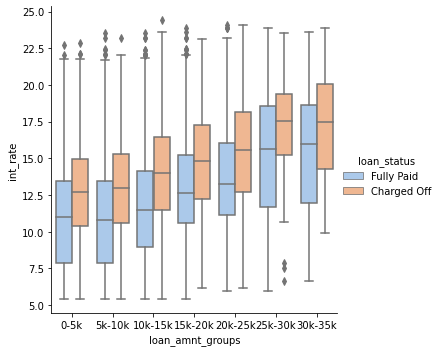

In [114]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =loan,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')
plt.show()

#### From the above chart we can say the interest rate of charged off loans is very high than that of fully paid loans in all the loan amount groups.

* This is one of the main reason for loan defaulting. 

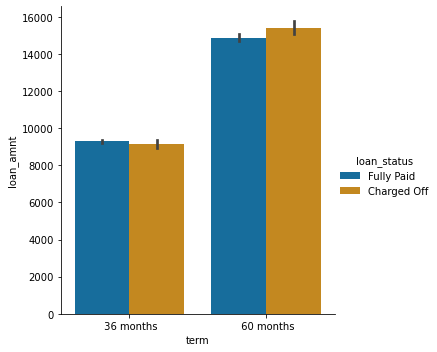

In [116]:
sns.catplot(x = 'term', y = 'loan_amnt', data = loan, hue = 'loan_status', kind = 'bar')
plt.show()

#### Applicants who applied and defaulted have no notable or big difference in loan_amounts.

* It means that applicants who are applying for long term has applied for more loan.



# Observations

### From the above analysis of each variables against the charged off loans suggests the following points.
#### There are more probability of defaulting when :

* Applicants who have an income of 70k-80k and received interest at the rate of 21-24%.
* Applicants who have taken a loan for small business and the loan amount is greater than 14k.
* Applicants whose home ownership is on 'MORTGAGE and have income of 60-70k.
* Applicants whose income are in between 60k -70k and taking loan for 'home improvement'.
* Applicants whose home ownership is on 'MORTGAGE and have loan of 14-16k.
* When grade is F and loan amount is between 15k-20k
* For grade G and interest rate above 20%
* When employment length is 10yrs and loan amount is 12k-14k
* When the loan is verified and loan amount is above 16k